# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
websites.shape

(1781, 21)

In [4]:
# Columns head
pd.set_option('display.max_columns', None)
websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,7,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0,0


In [5]:
# data types
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [6]:
# Website features
websites_num = websites.select_dtypes(include=np.number)
websites_num.fillna(websites_num.median(), inplace=True)
websites_num.isnull().sum()

URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CONTENT_LENGTH               0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

In [7]:
websites_num

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,1853.0,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,1853.0,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,8904.0,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,1853.0,0,0,0,0,0,0,0,0,0,0.0,0


[0.11756129 0.14720923 0.05272125 0.05027417 0.0953932  0.06849083
 0.05605991 0.05013606 0.11670759 0.12021815 0.0642452  0.06098311]


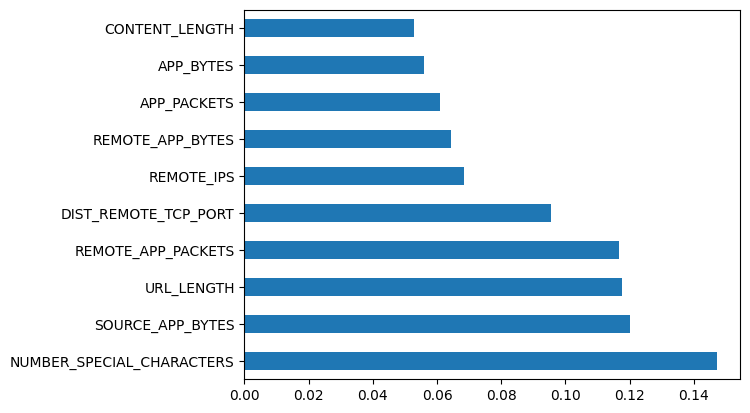

In [8]:
X = websites_num.iloc[:,0:12]
y = websites_num.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#  plot graph for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [9]:
import seaborn as sns

In [10]:
websites_num

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,7,263.0,7,0,2,700,9,10,1153,832,9,2.0,1
1,16,6,15087.0,17,7,4,1230,17,19,1265,1230,17,0.0,0
2,16,6,324.0,0,0,0,0,0,0,0,0,0,0.0,0
3,17,6,162.0,31,22,3,3812,39,37,18784,4380,39,8.0,0
4,17,6,124140.0,57,2,5,4278,61,62,129889,4586,61,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,194,16,1853.0,0,0,0,0,0,3,186,0,0,0.0,1
1777,198,17,1853.0,0,0,0,0,0,2,124,0,0,0.0,1
1778,201,34,8904.0,83,2,6,6631,87,89,132181,6945,87,4.0,0
1779,234,34,1853.0,0,0,0,0,0,0,0,0,0,0.0,0


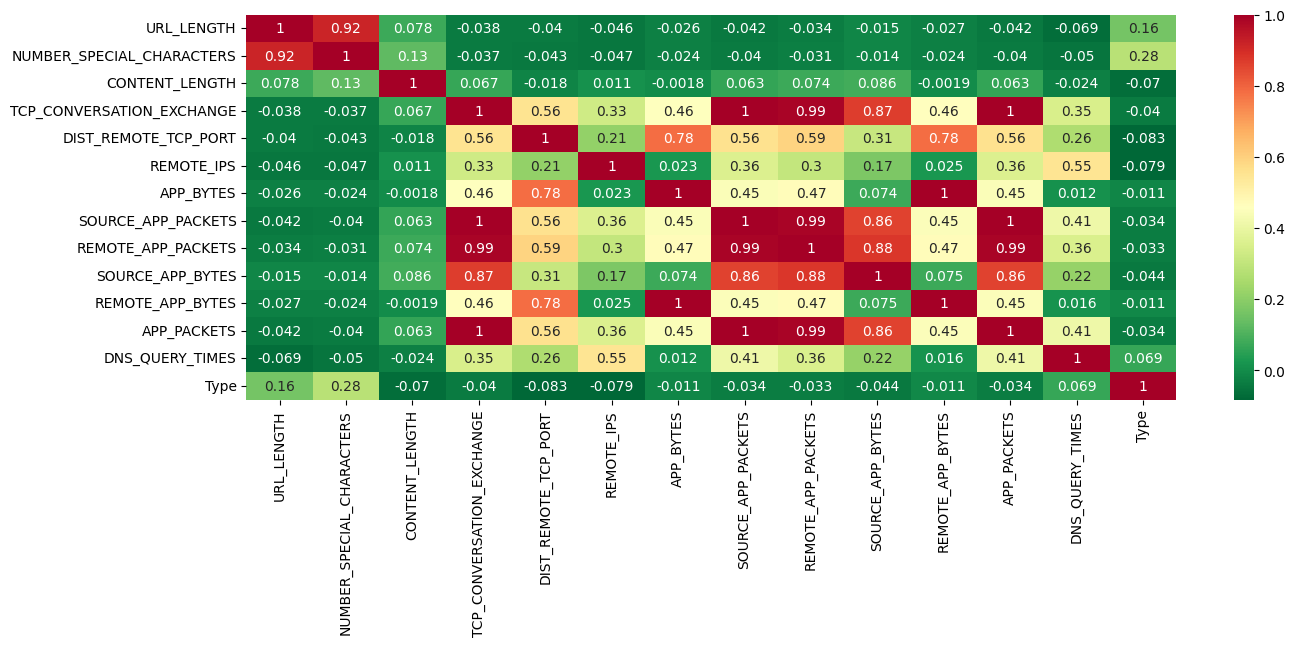

In [11]:
correlation_matrix = websites_num.corr()
top_corr_features = correlation_matrix.index
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
corrmap = sns.heatmap(websites_num[top_corr_features].corr(), annot=True,cmap="RdYlGn_r")


In [12]:
# 'APP_PACKETS','APP_BYTES', 'SOURCE_APP_PACKETS'

In [13]:
web_for_model = websites_num.drop(['APP_PACKETS','APP_BYTES', 'SOURCE_APP_PACKETS'], axis=1)

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

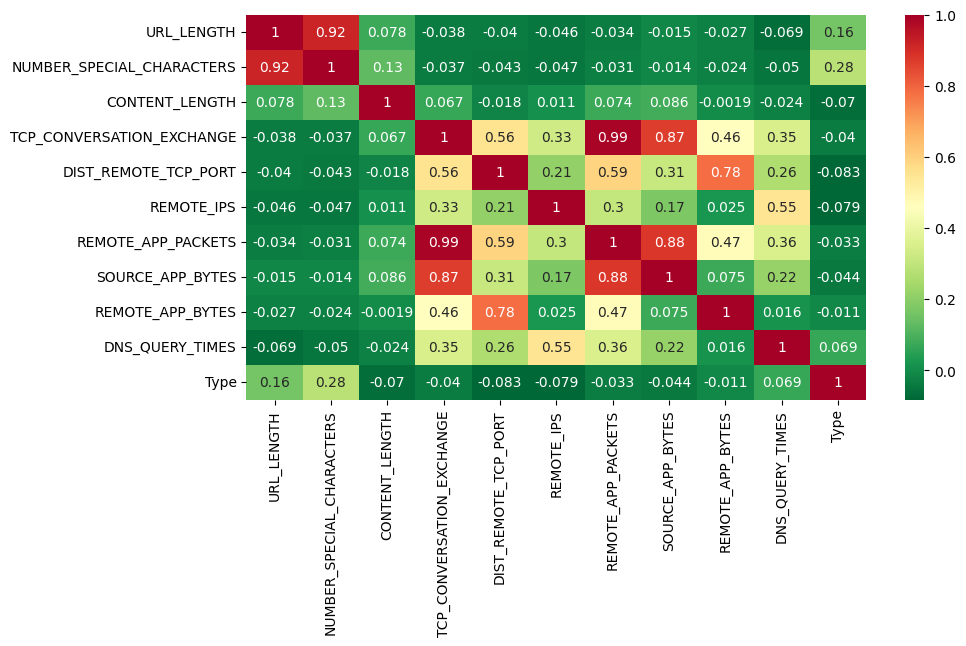

In [14]:
corrmat = web_for_model.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))

g=sns.heatmap(websites_num[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

In [15]:
web_for_model = websites_num.drop(columns=['TCP_CONVERSATION_EXCHANGE','APP_PACKETS','REMOTE_APP_PACKETS','REMOTE_APP_BYTES'], axis=1)

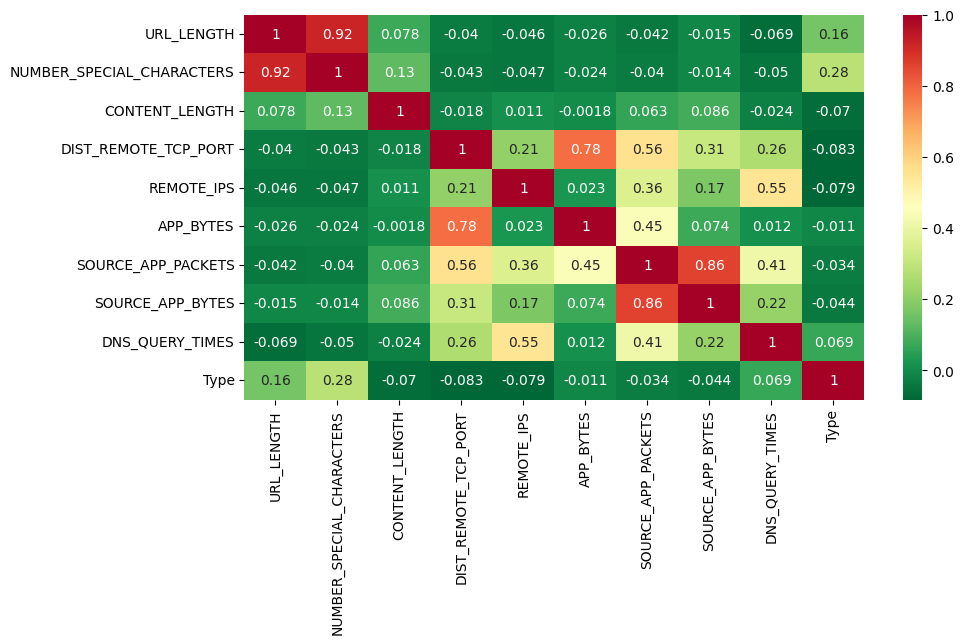

In [16]:
corrmat = web_for_model.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))

g=sns.heatmap(websites_num[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [17]:
websites_clean = websites.drop(['TCP_CONVERSATION_EXCHANGE', 'REMOTE_APP_PACKETS', 'REMOTE_APP_BYTES', 'APP_PACKETS'], axis=1)
websites_clean.isnull().sum()

URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
SOURCE_APP_BYTES               0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [18]:
#  Clearly the column that has the most missing values is CONTENT_LENGTH
websites_clean.drop(columns='CONTENT_LENGTH', axis=1, inplace=True)
websites_clean.dropna(axis=0, inplace=True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [19]:
websites_clean.isna().sum()

URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
SOURCE_APP_BYTES             0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [20]:
websites_clean['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US                957
CA                 75
ES                 63
AU                 26
PA                 21
GB                 13
JP                 10
CZ                  8
CN                  8
IN                  8
NL                  5
[u'GB'; u'UK']      5
CH                  5
BS                  4
UK                  4
ru                  4
AT                  4
KY                  3
PH                  3
SC                  3
us                  3
HK                  2
UA                  2
UY                  2
KG                  2
SI                  2
RU                  2
TR                  1
UG                  1
PK                  1
IL                  1
DE                  1
SE                  1
IT                  1
NO                  1
BE                  1
BY                  1
AE                  1
IE                  1
LV                  1
Name: count, dtype: int64

In [21]:
websites_clean['WHOIS_COUNTRY'].replace({'Cyprus': 'CY', 'United Kingdom':'UK', "[u'GB'; u'UK']":"UK",'us': 'US', 'se':'SE', 'ru':'RU'}, inplace=True)
websites_clean['WHOIS_COUNTRY'].value_counts()

WHOIS_COUNTRY
US    960
CA     75
ES     63
AU     26
PA     21
GB     13
JP     10
UK      9
CZ      8
CN      8
IN      8
RU      6
NL      5
CH      5
BS      4
AT      4
KY      3
PH      3
SC      3
UA      2
UY      2
KG      2
HK      2
SI      2
TR      1
PK      1
IL      1
DE      1
SE      1
IT      1
NO      1
BE      1
BY      1
AE      1
IE      1
UG      1
LV      1
Name: count, dtype: int64

In [22]:
# websites.loc[websites['WHOIS_COUNTRY']=='United Kingdom', 'WHOIS_COUNTRY' ] = 'UK'
# websites.loc[websites['WHOIS_COUNTRY']=="[u'GB'; u'UK']", 'WHOIS_COUNTRY' ] = 'UK'
# websites.loc[websites['WHOIS_COUNTRY']=="us", 'WHOIS_COUNTRY' ] = 'US'
# websites.loc[websites['WHOIS_COUNTRY']=="se", 'WHOIS_COUNTRY' ] = 'SE'
# websites.loc[websites['WHOIS_COUNTRY']=="Cyprus", 'WHOIS_COUNTRY' ] = 'CY'
# websites.loc[websites['WHOIS_COUNTRY']=="ru", 'WHOIS_COUNTRY' ] = 'RU'

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

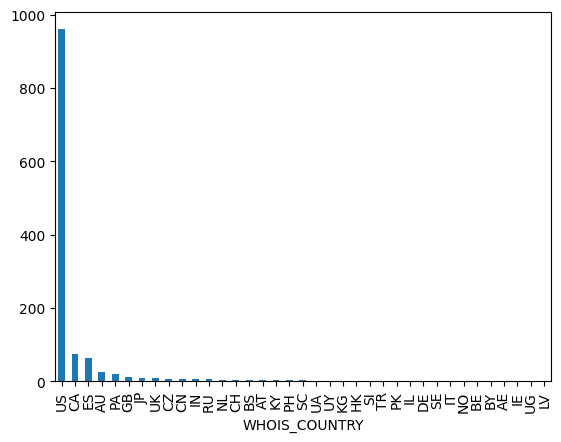

In [23]:
websites_clean.WHOIS_COUNTRY.value_counts().plot(kind='bar');

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [24]:
websites_clean

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type
3,B0_113,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,3812,39,18784,8.0,0
5,B0_2064,18,7,UTF-8,nginx,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,6,9,894,11,838,0.0,0
6,B0_462,18,6,iso-8859-1,Apache/2,US,CO,29/07/2002 0:00,1/07/2016 0:00,0,3,1189,14,8559,2.0,0
7,B0_1128,19,6,us-ascii,Microsoft-HTTPAPI/2.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,0,0,0,0,0,0.0,0
10,B0_1013,20,6,utf-8,Apache,US,Kansas,14/09/2007 0:00,9/09/2015 0:00,0,0,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M4_48,194,16,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,186,0.0,1
1777,M4_41,198,17,UTF-8,Apache,ES,Barcelona,17/09/2008 0:00,2/09/2016 0:00,0,0,0,0,124,0.0,1
1778,B0_162,201,34,utf-8,Apache/2.2.16 (Debian),US,FL,15/02/1999 0:00,15/07/2015 0:00,2,6,6631,87,132181,4.0,0
1779,B0_1152,234,34,ISO-8859-1,cloudflare-nginx,US,CA,1/04/1998 0:00,9/12/2016 0:00,0,0,0,0,0,0.0,0


/!\ It seems the code below breaks the dataframe into a 'nonetype' /!\ 

In [25]:
# make a list of the top 10 values
top_10 = websites_clean['WHOIS_COUNTRY'].value_counts()[:10].index.tolist()
#  make a for loop to reclassify everything NOT in top_10 to 'OTHER'
websites_clean['WHOIS_COUNTRY'].replace([x for x in websites_clean['WHOIS_COUNTRY'] if x not in top_10], 'OTHER', inplace=True)

#new_df = np.where((website_clean['WHOIS_COUNTRY'] == [t for t in test]))
websites_clean['WHOIS_COUNTRY'].unique()
#so i cutted the data to top 10

array(['US', 'OTHER', 'AU', 'CA', 'PA', 'GB', 'UK', 'JP', 'CN', 'CZ',
       'ES'], dtype=object)

In [26]:
websites_clean.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [27]:
#Alternative solution to not cut the data in two

len(websites['WHOIS_COUNTRY'].value_counts()) #45
countries = websites['WHOIS_COUNTRY'].value_counts().nlargest(11)
countries_other = dict(websites['WHOIS_COUNTRY'].value_counts().nsmallest(34))
countries_other_2 = list(countries_other.keys())
countries_other_2
websites.loc[(websites['WHOIS_COUNTRY'].isin(countries_other_2)), 'WHOIS_COUNTRY'] = 'OTHER'

In [28]:
websites_clean.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [29]:
# Your code here
websites_clean = websites.drop(columns=['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [30]:
websites_clean.drop(['URL'],axis = 1, inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop'

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [ ]:
websites_clean['CHARSET'].unique()

array(['ISO-8859-1', 'UTF-8', 'iso-8859-1', 'us-ascii', 'utf-8',
       'windows-1251', 'windows-1252'], dtype=object)

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [ ]:
websites_clean['SERVER'].unique()

array(['nginx', 'Apache/2', 'Microsoft-HTTPAPI/2.0', 'Apache',
       'openresty/1.11.2.1', 'Apache/2.4.7 (Ubuntu)', 'nginx/1.12.0',
       'Apache/2.4.12 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'cloudflare-nginx', 'Apache/2.2.22', 'nginx/1.8.0',
       'Apache/2.2.29 (Amazon)', 'Microsoft-IIS/7.5',
       'Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_bwlimited/1.4',
       'Apache/2.2.22 (Debian)', 'Apache/2.2.15 (CentOS)',
       'Apache/2.4.25 (Amazon) PHP/7.0.14', 'GSE',
       'Apache/2.4.23 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Pepyaka/1.11.3', 'Apache/2.4.25 (Amazon) OpenSSL/1.0.1k-fips',
       'Apache/2.2.22 (Ubuntu)', 'Apache/2.4.25', 'Tengine',
       'Apache/2.4.18 (Unix) OpenSSL/0.9.8e-fips-rhel5 mod_bwlimited/1.4',
       'Apache/2.4.6 (CentOS) PHP/5.6.8', 'AmazonS3',
       'Apache/1.3.37 (Unix) mod_perl/1.29 mod_ssl/2.8.28 OpenSSL/0.9.7e-p1',
       'ATS', 'CherryPy/3.6.0', 'Apache/2.2.15 (Red Hat)', 'Server',
       'Apache/2.4.6 (C

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [ ]:
server_types = ['Microsoft','Apache','nginx']

websites_clean['SERVER_TYPE'] = np.where(websites_clean['SERVER'].str.contains('|'.join(server_types)),
                                websites_clean['SERVER'].str.extract('({})'.format('|'.join(server_types)),
                                expand=False).str.lower(), 'Other')

In [ ]:
websites_clean['SERVER_TYPE'].unique()

array(['nginx', 'apache', 'microsoft', 'Other'], dtype=object)

In [ ]:
# Alternative solution:

# def fix_server_names(x):
#     x = str(x)
#     if 'Apache' in x:
#         return 'Apache'
#     elif 'Microsoft' in x:
#         return 'Microsoft'
#     elif 'nginx' in x:
#         return 'nginx'
#     else:
#         return 'Other'
    
# websites['SERVER'] = websites['SERVER'].apply(fix_server_names)

In [ ]:
websites_clean.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,SOURCE_APP_BYTES,DNS_QUERY_TIMES,Type,SERVER_TYPE
3,17,6,ISO-8859-1,nginx,US,AK,7/10/1997 4:00,12/09/2013 0:45,22,3,3812,39,18784,8.0,0,nginx
5,18,7,UTF-8,nginx,SC,Mahe,3/08/2016 14:30,3/10/2016 3:45,6,9,894,11,838,0.0,0,nginx
6,18,6,iso-8859-1,Apache/2,US,CO,29/07/2002 0:00,1/07/2016 0:00,0,3,1189,14,8559,2.0,0,apache
7,19,6,us-ascii,Microsoft-HTTPAPI/2.0,US,FL,18/03/1997 0:00,19/03/2017 0:00,0,0,0,0,0,0.0,0,microsoft
10,20,6,utf-8,Apache,US,Kansas,14/09/2007 0:00,9/09/2015 0:00,0,0,0,0,0,0.0,0,apache


OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [ ]:
websites_dummy = pd.get_dummies(websites_clean)

Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [ ]:
websites_dummy.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('bool')], dtype=object)

In [ ]:
websites_dummy.head()

URL_LENGTH  NUMBER_SPECIAL_CHARACTERS  DIST_REMOTE_TCP_PORT  REMOTE_IPS   
3           17                          6                    22           3  \
5           18                          7                     6           9   
6           18                          6                     0           3   
7           19                          6                     0           0   
10          20                          6                     0           0   

    APP_BYTES  SOURCE_APP_PACKETS  SOURCE_APP_BYTES  DNS_QUERY_TIMES  Type   
3        3812                  39             18784              8.0     0  \
5         894                  11               838              0.0     0   
6        1189                  14              8559              2.0     0   
7           0                   0                 0              0.0     0   
10          0                   0                 0              0.0     0   

    CHARSET_ISO-8859-1  CHARSET_UTF-8  CHARSET_iso-8859-1  CHARSET_us-ascii   
3                 True          False               False             False  \
5                False           True               False             False   
6                False          False                True             False   
7                False          False               False              True   
10               False          False               False             False   

    CHARSET_utf-8  CHARSET_windows-1251  CHARSET_windows-1252   
3           False                 False                 False  \
5           False                 False                 False   
6           False                 False                 False   
7           False                 False                 False   
10           True                 False                 False   

    SERVER_.V01 Apache  SERVER_ATS  SERVER_ATS/5.3.0   
3                False       False             False  \
5                False       False             False   
6                False       False             False   
7                False       False             False   
10               False       False             False   

    SERVER_Aeria Games & Entertainment  SERVER_AkamaiGHost  SERVER_AmazonS3   
3                                False               False            False  \
5                                False               False            False   
6                                False               False            False   
7                                False               False            False   
10                               False               False            False   

    SERVER_Apache  SERVER_Apache-Coyote/1.1   
3           False                     False  \
5           False                     False   
6           False                     False   
7           False                     False   
10           True                     False   

    SERVER_Apache/1.3.31 (Unix) PHP/4.3.9 mod_perl/1.29 rus/PL30.20   
3                                               False                \
5                                               False                 
6                                               False                 
7                                               False                 
10                                              False                 

    SERVER_Apache/1.3.33 (Unix) mod_ssl/2.8.24 OpenSSL/0.9.7e-p1 PHP/4.4.8   
3                                               False                       \
5                                               False                        
6                                               False                        
7                                               False                        
10                                              False                        

    SERVER_Apache/1.3.34 (Unix) PHP/4.4.4   
3                                   False  \
5                                   False   
6                                   False   
7                      

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer

model = LogisticRegression(max_iter=1000)
trans = PowerTransformer()

X_train_mod = trans.transform(X_train)
X_test_mod = trans.transform(X_test)

NotFittedError: This PowerTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [ ]:
model.fit(X_train_mod,y_train)

LogisticRegression(max_iter=1000)

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [ ]:
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay)

In [ ]:
y_pred_train = model.predict(X_train_mod)
y_pred_test = model.predict(X_test_mod)

In [ ]:
perf_log = pd.DataFrame({'Error_metric' : ['Accuracy','Precision','Recall'],
                         'Train' : [accuracy_score(y_train, y_pred_train),
                                    precision_score(y_train, y_pred_train),
                                    recall_score(y_train, y_pred_train)],

                        'Test' : [accuracy_score(y_test, y_pred_test),
                                  precision_score(y_test, y_pred_test),
                                  recall_score(y_test, y_pred_test)]
                        })

display(perf_log)

,Error_metric,Train,Test
0,Accuracy,1.0,0.968254
1,Precision,1.0,1.000000
2,Recall,1.0,0.724138


Confusion matrix for the train set
[[892   0]
 [  0 113]]


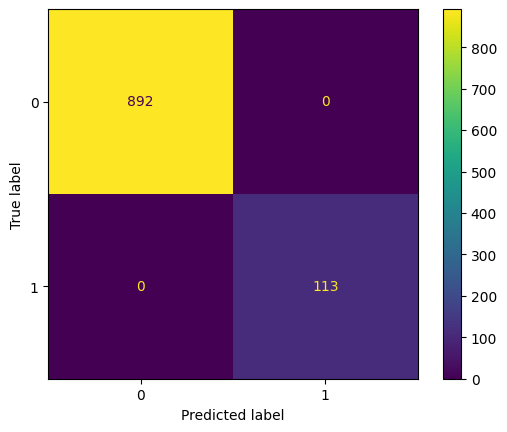



Confusion matrix for the test set
[[223   0]
 [  8  21]]


ValueError: Mix type of y not allowed, got types {'continuous-multioutput', 'binary'}

In [ ]:
print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train))
ConfusionMatrixDisplay.from_estimator(model,X_train_mod,y_train)
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test))
ConfusionMatrixDisplay.from_predictions(X_test_mod,y_test)
plt.show()

What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [37]:
X_train_kn, X_test_kn, y_train_kn, y_test_kn = train_test_split(X, y, test_size=TT_SPLIT, random_state=RAND_STATE)

In [38]:
kn_model = KNeighborsClassifier(n_neighbors=2, weights='uniform')
kn_model.fit(X_train_kn,y_train_kn) # train model

y_pred_kn = kn_model.predict(X_test_kn) # predict test
y_pred_train_kn = model.predict(X_train_kn) # predict train (for sanity checks)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


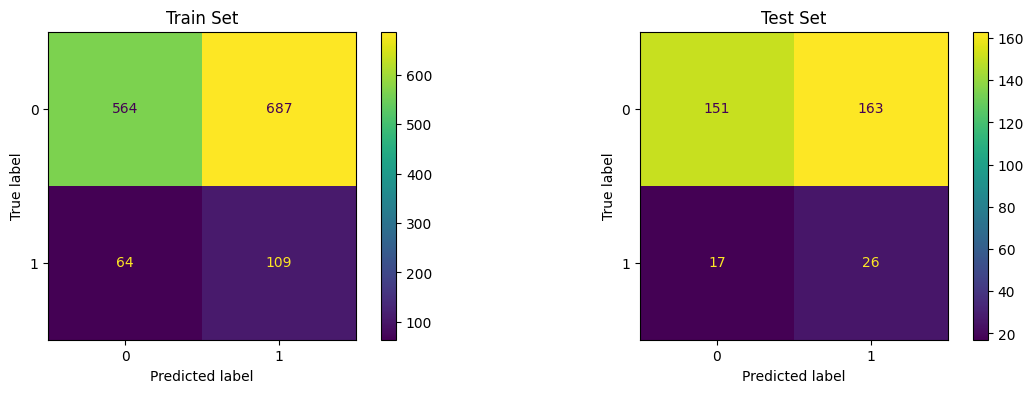

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(14,4))

ConfusionMatrixDisplay.from_estimator(model,X_train,y_train,ax=ax[0])
ax[0].title.set_text("Train Set")

ConfusionMatrixDisplay.from_estimator(model,X_test,y_test,ax=ax[1])
ax[1].title.set_text("Test Set")

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
# Your code here:



Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:



#### Please implement decision tree, random forest, SVM and extra tree. Which model is better? 

# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here